# Processing -1 Year

# Table of Contents
1. [Import Packages](#imports)
2. [Import the Data](#importdata)
3. [Preprocess Data](#preprocess)
4. [Data Visualizations](#dataviz)
5. [Save Processed Data](#processeddata)




### Import Packages   <a name="imports"></a>

In [57]:
# Import  libraries

import pandas as pd
import numpy as np 


### Import the data  <a name="importdata"></a>

In [58]:
#Year1 = pd.read_csv('Data/DadosPorAno/Year1Raw.csv', encoding="ANSI", sep=';')
Year1 = pd.read_csv('Data/DadosPorAno/Year1.csv', sep=';')

Year1.head(5)

,Estruturação da Dreamfactory,Acha que ferramenta é fácil ou difícil de preencher?,Estruturação da Dreamfactory.1,Em que medida os vídeos foram úteis ou pedagógicos?,Em que medida os exemplos foram úteis ou pedagógicos?
0,Satisfeito,Fácil,está no seu formato ideal,5,3
1,Indiferente,Fácil,está no seu formato ideal,1,4
2,Satisfeito,Fácil,gostaria de mais perguntas intermédias,5,4
3,Satisfeito,Fácil,gostaria de mais perguntas intermédias,5,4
4,Satisfeito,Muito fácil,gostaria de mais perguntas intermédias,2,2


In [59]:
Year1['Estruturação da Dreamfactory.1'].unique()

array(['está no seu formato ideal',
       'gostaria de mais perguntas intermédias', 'tem perguntas a mais'],
      dtype=object)

### PreProcess Data  <a name="preprocess"></a>

In [60]:
Year1['Estruturação da Dreamfactory'].unique()

array(['Satisfeito', 'Indiferente', 'Pouco satisfeito',
       'Muito satisfeito'], dtype=object)

In [61]:
Year1.loc[Year1['Estruturação da Dreamfactory']== "Pouco satisfeito", 'Está satisfeito com a ferramenta Dreamfactory?'] = 1
Year1.loc[Year1['Estruturação da Dreamfactory'] == "Indiferente", 'Está satisfeito com a ferramenta Dreamfactory?'] = 2
Year1.loc[Year1['Estruturação da Dreamfactory'] == "Satisfeito", 'Está satisfeito com a ferramenta Dreamfactory?'] = 3
Year1.loc[Year1['Estruturação da Dreamfactory'] == "Muito satisfeito", 'Está satisfeito com a ferramenta Dreamfactory?'] = 4


### Data Visualizations  <a name="dataviz"></a>

In [62]:
Year1Liked = Year1['Está satisfeito com a ferramenta Dreamfactory?']
Year1LikedOrig= Year1Liked.copy()

In [63]:
unique_elements, counts_elements = np.unique(Year1Liked, return_counts=True)


In [64]:
Year1Liked = pd.DataFrame({'Liked?':unique_elements, 'counts':counts_elements})


In [65]:
Year1Liked
Year1Liked['year'] = 'PreviousYear'
Year1Liked['population'] = 91
Year1Liked['percentage'] = Year1Liked['counts']/Year1Liked['population']



In [66]:
Liked = ["Year", "AverageLiked"]

LikedOverYears = pd.DataFrame(columns = Liked)

In [67]:
import statistics 
meanLiked=statistics.mean(Year1LikedOrig)

In [68]:
meanLiked

2.6263736263736264

In [69]:
df2 = pd.DataFrame([ ['1-PreviousYear', meanLiked]], columns=["Year", "AverageLiked"])


LikedOverYears=LikedOverYears.append(df2)


In [70]:
Year1Liked['Liked?'] = Year1Liked['Liked?'].astype(int)


#df[list("ABCD")] = df[list("ABCD")].astype(int)

In [71]:
Year1Liked.dtypes

Liked?          int32
counts          int64
year           object
population      int64
percentage    float64
dtype: object

In [72]:
Year1Liked

,Liked?,counts,year,population,percentage
0,1,15,PreviousYear,91,0.164835
1,2,11,PreviousYear,91,0.120879
2,3,58,PreviousYear,91,0.637363
3,4,7,PreviousYear,91,0.076923


In [73]:
import plotly_express as px

fig = px.bar(Year1Liked, x='Liked?', y='percentage',
             labels={'Liked?':'Gostou?',
                    'percentage':'Percentagem'})

fig.update_layout(title_text='Está satisfeito com a ferramenta Dreamfactory?- Ano Anterior')
fig.update_layout(xaxis_type='category')


fig.show()
fig.write_image('Outputs/ImageOutputsYear/Year1Liked.png')


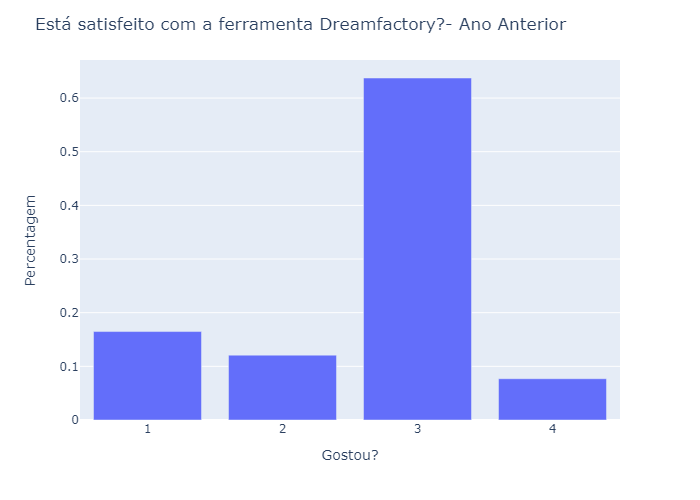

In [74]:
from IPython.display import Image
Image(filename='Outputs/ImageOutputsYear/Year1Liked.png')


 ### Em que medida os vídeos foram úteis ou pedagógicos?	

In [75]:
Year1videos = Year1['Em que medida os vídeos foram úteis ou pedagógicos?']




In [76]:
unique_elements, counts_elements = np.unique(Year1videos, return_counts=True)


In [77]:
Year1videos = pd.DataFrame({'Liked?':unique_elements, 'counts':counts_elements})


In [78]:
Year1videos
Year1videos['year'] = 'PreviousYear'
Year1videos['population'] = 91
Year1videos['percentage'] = Year1videos['counts']/Year1videos['population']



In [79]:
Year1videos

,Liked?,counts,year,population,percentage
0,1,3,PreviousYear,91,0.032967
1,2,5,PreviousYear,91,0.054945
2,3,20,PreviousYear,91,0.219780
3,4,25,PreviousYear,91,0.274725
4,5,34,PreviousYear,91,0.373626
5,Não sei/Não respondo,4,PreviousYear,91,0.043956


In [80]:
(1*3+2*5+3*20+4*25+5*34)/87

3.942528735632184

In [81]:
import plotly_express as px

fig = px.bar(Year1videos, x='Liked?', y='percentage',
             labels={'Liked?':'Utilidade',
                    'percentage':'Percentagem'})


fig.update_layout(title_text='Em que medida os vídeos foram úteis ou pedagógicos?- Ano Anterior')
fig.update_layout(xaxis_type='category')


fig.show()
fig.write_image('Outputs/ImageOutputsYear/Year1videos.png')


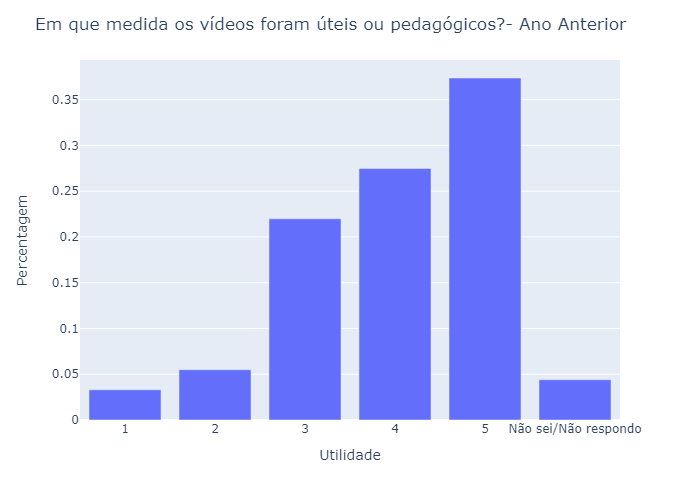

In [82]:
from IPython.display import Image
Image(filename='Outputs/ImageOutputsYear/Year1videos.png')


 ### Em que medida os exemplos foram úteis ou pedagógicos?	

In [83]:
Year1exemplos = Year1['Em que medida os exemplos foram úteis ou pedagógicos?']




In [84]:
unique_elements, counts_elements = np.unique(Year1exemplos, return_counts=True)


In [85]:
Year1exemplos = pd.DataFrame({'Liked?':unique_elements, 'counts':counts_elements})


In [86]:
Year1exemplos
Year1exemplos['year'] = 'PreviousYear'
Year1exemplos['population'] = 91
Year1exemplos['percentage'] = Year1exemplos['counts']/Year1exemplos['population']



In [87]:
Year1exemplos

,Liked?,counts,year,population,percentage
0,1,1,PreviousYear,91,0.010989
1,2,3,PreviousYear,91,0.032967
2,3,15,PreviousYear,91,0.164835
3,4,40,PreviousYear,91,0.439560
4,5,31,PreviousYear,91,0.340659
5,Não sei/Não respondo,1,PreviousYear,91,0.010989


In [88]:
(1+2*3+3*15+4*40+5*31)/90

4.0777777777777775

In [89]:
import plotly_express as px

fig = px.bar(Year1exemplos, x='Liked?', y='percentage',
             labels={'Liked?':'Utilidade',
                    'percentage':'Percentagem'})


fig.update_layout(title_text='Em que medida os exemplos foram úteis ou pedagógicos?- Ano Anterior')
fig.update_layout(xaxis_type='category')


fig.show()
fig.write_image('Outputs/ImageOutputsYear/Year1exemplos.png')


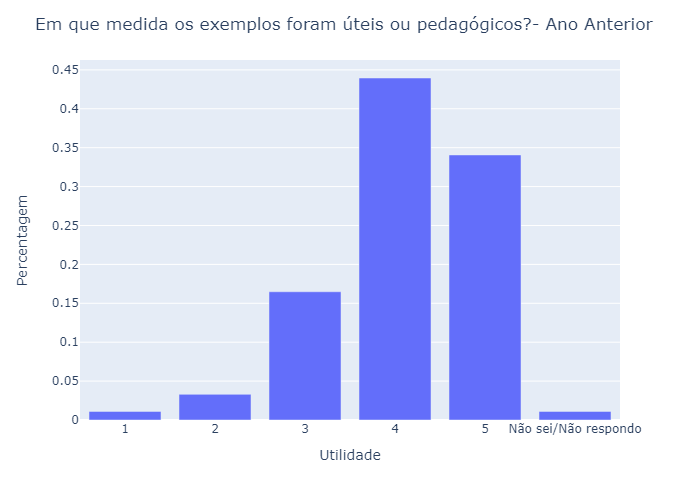

In [90]:
from IPython.display import Image
Image(filename='Outputs/ImageOutputsYear/Year1exemplos.png')


## Estruturação da Dreamfactory.1

In [91]:
Year1['Estruturação da Dreamfactory.1'].unique()

array(['está no seu formato ideal',
       'gostaria de mais perguntas intermédias', 'tem perguntas a mais'],
      dtype=object)

In [92]:
Year1.loc[Year1['Estruturação da Dreamfactory.1']== "gostaria de mais perguntas intermédias", 'Estruturação da Dreamfactory.1NUM'] = 1
Year1.loc[Year1['Estruturação da Dreamfactory.1']== "está no seu formato ideal", 'Estruturação da Dreamfactory.1NUM'] = 2
Year1.loc[Year1['Estruturação da Dreamfactory.1']== "tem perguntas a mais", 'Estruturação da Dreamfactory.1NUM'] = 3


In [93]:
Year1Estrutura = Year1['Estruturação da Dreamfactory.1NUM']


import statistics 
meanestrutura=statistics.mean(Year1Estrutura)

meanestrutura

1.7802197802197801

In [94]:
unique_elements, counts_elements = np.unique(Year1Estrutura, return_counts=True)


In [95]:
Year1Estrutura = pd.DataFrame({'Liked?':unique_elements, 'counts':counts_elements})


In [96]:
Year1Estrutura
Year1Estrutura['year'] = 'PreviousYear'
Year1Estrutura['population'] = 91
Year1Estrutura['percentage'] = Year1Estrutura['counts']/Year1Estrutura['population']

Year1Estrutura['Liked?']=Year1Estrutura['Liked?'].astype(str)

In [97]:
Year1Estrutura

,Liked?,counts,year,population,percentage
0,1.0,30,PreviousYear,91,0.32967
1,2.0,51,PreviousYear,91,0.56044
2,3.0,10,PreviousYear,91,0.10989


In [98]:
(30+2*51+3*10)/91


1.7802197802197801

In [99]:
import plotly_express as px

fig = px.bar(Year1Estrutura, x='Liked?', y='percentage',
             labels={'Liked?':'1-Poucas Perguntas, 2 - Ideal, 3 - Perguntas a Mais',
                    'percentage':'Percentagem'})


fig.update_layout(title_text='Estruturação da DreamFactory - Ano Anterior')
fig.update_layout(xaxis_type='category')


fig.show()
fig.write_image('Outputs/ImageOutputsYear/Year1Estrutura.png')


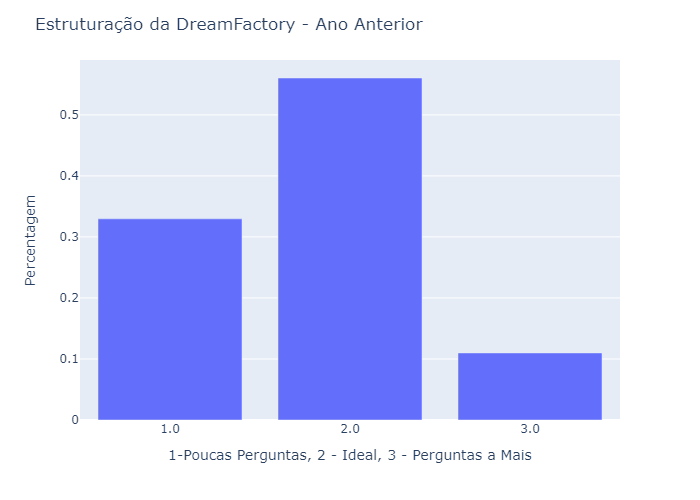

In [100]:
from IPython.display import Image
Image(filename='Outputs/ImageOutputsYear/Year1Estrutura.png')


## Acha que ferramenta é fácil ou difícil de preencher?	

In [101]:
Year1['Acha que ferramenta é fácil ou difícil de preencher?'].unique()

array(['Fácil', 'Muito fácil', 'Difícil'], dtype=object)

In [102]:
Year1.loc[Year1['Acha que ferramenta é fácil ou difícil de preencher?']== "Difícil", 'Acha que ferramenta é fácil ou difícil de preencher?NUM'] = 1
Year1.loc[Year1['Acha que ferramenta é fácil ou difícil de preencher?']== "Fácil", 'Acha que ferramenta é fácil ou difícil de preencher?NUM'] = 2
Year1.loc[Year1['Acha que ferramenta é fácil ou difícil de preencher?']== "Muito fácil", 'Acha que ferramenta é fácil ou difícil de preencher?NUM'] = 3


In [103]:
Year1Facilidade = Year1['Acha que ferramenta é fácil ou difícil de preencher?NUM']


import statistics 
meanfacilidade=statistics.mean(Year1Facilidade)

meanfacilidade



2.043956043956044

In [104]:
unique_elements, counts_elements = np.unique(Year1Facilidade, return_counts=True)


In [105]:
Year1Facilidade = pd.DataFrame({'Liked?':unique_elements, 'counts':counts_elements})


In [106]:
Year1Facilidade
Year1Facilidade['year'] = 'PreviousYear'
Year1Facilidade['population'] = 91
Year1Facilidade['percentage'] = Year1Facilidade['counts']/Year1Facilidade['population']

Year1Facilidade['Liked?']=Year1Facilidade['Liked?'].astype(str)

In [107]:
Year1Facilidade

,Liked?,counts,year,population,percentage
0,1.0,12,PreviousYear,91,0.131868
1,2.0,63,PreviousYear,91,0.692308
2,3.0,16,PreviousYear,91,0.175824


In [108]:
import plotly_express as px

fig = px.bar(Year1Facilidade, x='Liked?', y='percentage',
             labels={'Liked?':'1-Díficil, 2 - Fácil, 3 - Muito Fácil',
                    'percentage':'Percentagem'})


fig.update_layout(title_text='Acha que ferramenta é fácil ou difícil de preencher?- Ano Anterior')
fig.update_layout(xaxis_type='category')


fig.show()
fig.write_image('Outputs/ImageOutputsYear/Year1Facilidade.png')


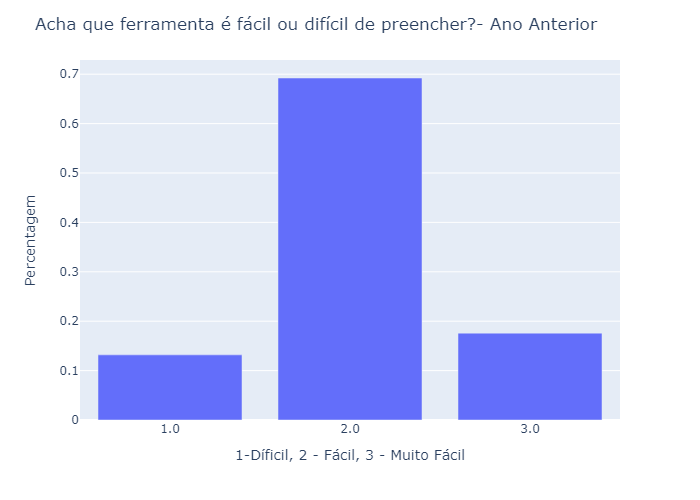

In [109]:
from IPython.display import Image
Image(filename='Outputs/ImageOutputsYear/Year1Facilidade.png')


### Save Processed Data<a name="processeddata"></a>

In [110]:
Year1.to_csv(r'Data/DadosPorAnoProcessados/Year1Processed.csv', index = False)


In [111]:
LikedOverYears.to_csv(r'Data/DadosAoLongoDosAnos/LikedOverYearsYEAR1.csv', index = False)


In [112]:
LikedOverYears

,Year,AverageLiked
0,1-PreviousYear,2.626374
